# Esercitazione di Laboratorio n. 4

#### Autore: Davide Cernuzio

### Parte III: Sistema di Equazioni Differenziali

Risolvere il seguente sistema di equazioni differenziali con il metodo di Runge-Kutta-Fehlberg

$\displaystyle \large \begin{cases} \displaystyle \frac{dx}{dt} = f(t,x,y) = xy + t \\ \\ \displaystyle \frac{dy}{dt} = g(t,x,y) = ty + x \\ \\ x(0)=1, \; y(0) = -1  \end{cases}$

Graficare la soluzione nell'intervallo $[0,1]$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
t=time()

t0, t_fin = 0,  1
x0, y0    = 1, -1

f = lambda t,x,y: x*y + t
g = lambda t,x,y: t*y + x

def Fehlberg(h = .0001):
    
    global h0, N, t_array, x_array, y_array
    h0 = h
    N = int( round((t_fin - t0)/h, 0) )
    
    t_array = np.append([t0], np.empty(N))
    x_array = np.append([x0], np.empty(N))
    y_array = np.append([y0], np.empty(N))
    
    x_i, y_i = x0, y0
    for i in range(1, N+1):
        t_i = t0 + (i-1)*h
        t_array[i] = t_i + h
        
        k1x = h * f(t_i, x_i, y_i)
        k2x = h * f(t_i + h/4,     x_i + k1x/4,                                                                     y_i)
        k3x = h * f(t_i + 3/8*h,   x_i + 3/32*k1x      + 9/32*k2x,                                                  y_i)
        k4x = h * f(t_i + 12/13*h, x_i + 1932/2197*k1x - 7200/2197*k2x + 7296/2197*k3x,                             y_i)
        k5x = h * f(t_i + h,       x_i + 439/216*k1x   - 8*k2x         + 3680/513*k3x  - 845/4104*k4x,              y_i)
        k6x = h * f(t_i + h/2,     x_i - 8/27*k1x      + 2*k2x         - 3544/2565*k3x + 1859/4104*k4x - 11/40*k5x, y_i)
        
        k1y = h * g(t_i, x_i, y_i)
        k2y = h * g(t_i + h/4,     x_i, y_i + k1y/4)
        k3y = h * g(t_i + 3/8*h,   x_i, y_i + 3/32*k1y      + 9/32*k2y)
        k4y = h * g(t_i + 12/13*h, x_i, y_i + 1932/2197*k1y - 7200/2197*k2y + 7296/2197*k3y)
        k5y = h * g(t_i + h,       x_i, y_i + 439/216*k1y   - 8*k2y         + 3680/513*k3y  - 845/4104*k4y)
        k6y = h * g(t_i + h/2,     x_i, y_i - 8/27*k1y      + 2*k2y         - 3544/2565*k3y + 1859/4104*k4y - 11/40*k5y)
        
        x_i += 16/135*k1x + 6656/12825*k3x + 28561/56430*k4x - 9/50*k5x + 2/55*k6x
        y_i += 16/135*k1y + 6656/12825*k3y + 28561/56430*k4y - 9/50*k5y + 2/55*k6y
        
        #x_i += 25/216*k1x + 1408/2565*k3x + 2197/4104*k4x - k5x/5
        #y_i += 25/216*k1y + 1408/2565*k3y + 2197/4104*k4y - k5y/5
        
        x_array[i] = x_i
        y_array[i] = y_i


Fehlberg()

#check_x e check_y servono a verificare l'accuratezza delle soluzioni numeriche: essi vengono riempiti con le derivate di
#x(t) e y(t) al variare di t_i; per la stima della derivata è stato usato il metodo delle differenze finite al quart'ordine:
#questo richiede la conoscenza, oltre che di x (y), anche di x-h, x-2h, x+h, x+2h. È il motivo per cui i primi due e gli
#ultimi due elementi dei due array sono occupati da un NaN: è impossibile calcolare la derivata in quei punti con il metodo
#proposto (sarebbe in linea di principio possibile farlo con un metodo che sfrutti meno punti, e quindi meno accurato, ma
#per omogeneità del risultato si è preferito usare la stessa formula su tutti i t_i). Idealmente risulterebbe
#x'(t) = f(x(t), y(t), t) e y'(t) = f(x(t), y(t), t), ossia check_x - f(x_array, y_array, t_array) = 0 e
#check_y - g(x_array, y_array, t_array) = 0; in realtà il risultato sarà solo prossimo allo zero (sia perché le soluzioni
#x(t), y(t) sono approssimate, sia perché tali sono le derivate). Per verificare l'accuratezza delle soluzioni, sono state
#graficate queste due differenze.

check_x = np.empty(N+1)
check_y = np.empty(N+1)

for i in [0,1,-2,-1]:
    check_x[i], check_y[i] = np.nan, np.nan

for i in range(2,N-1):
    check_x[i] = (x_array[i-2] - 8*x_array[i-1] + 8*x_array[i+1] - x_array[i+2])/(12*h0) - f(t_array[i], x_array[i] , y_array[i])
    check_y[i] = (y_array[i-2] - 8*y_array[i-1] + 8*y_array[i+1] - y_array[i+2])/(12*h0) - g(t_array[i], x_array[i] , y_array[i])

t=time()-t
print('Tempo di esecuzione: t =',round(t,3),'s\n')

Tempo di esecuzione: t = 0.135 s



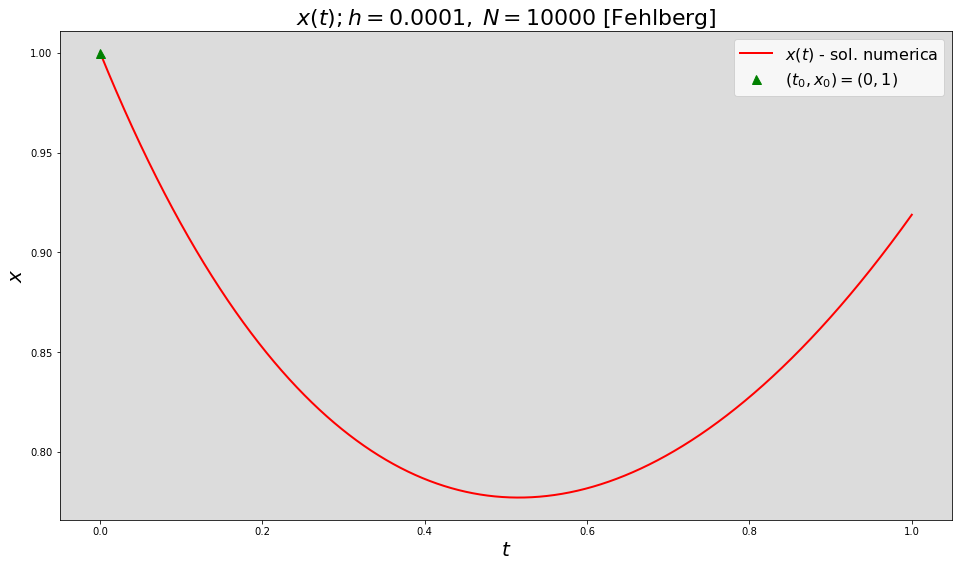

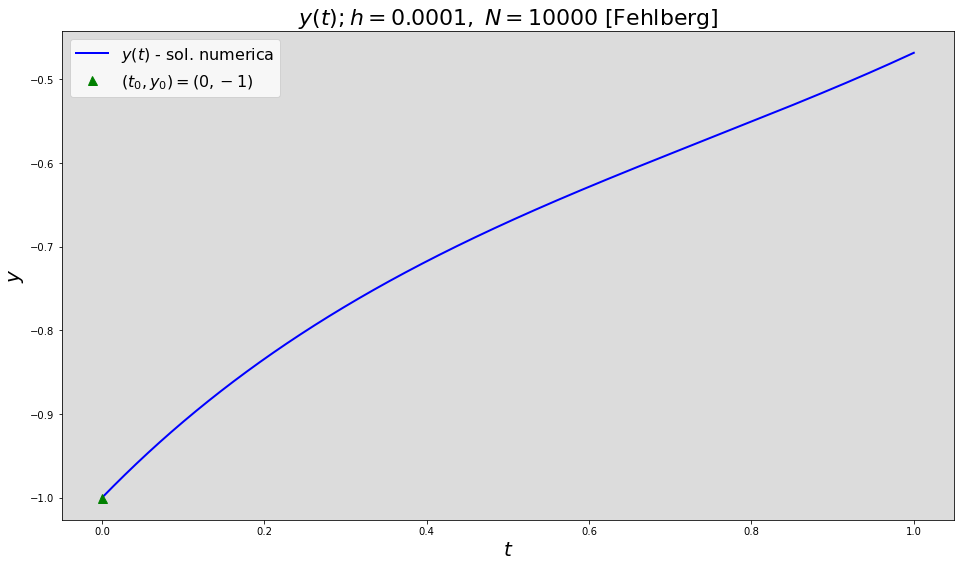

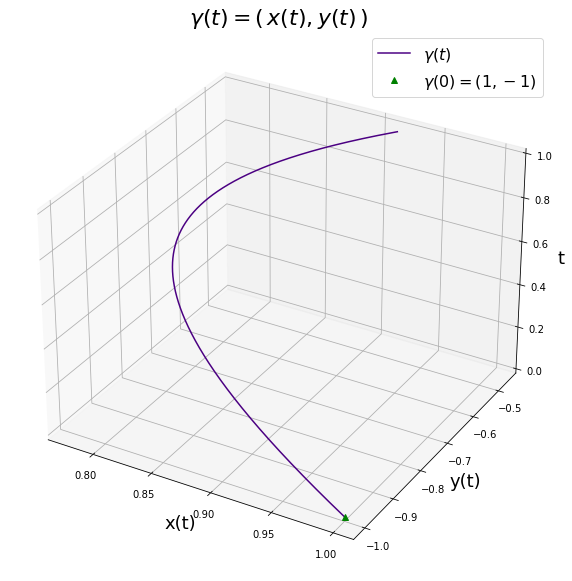

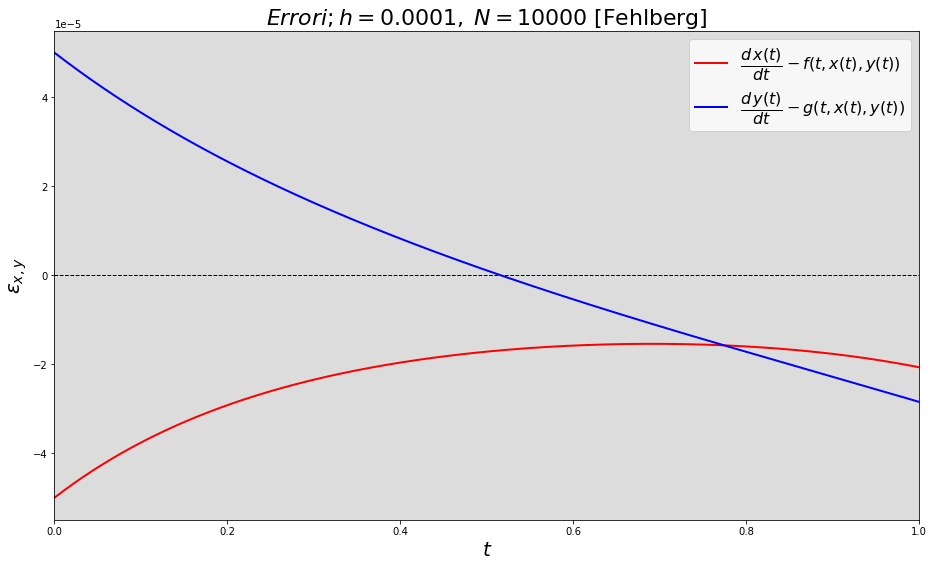

In [2]:
plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$x(t); h = '+str(round(h0,6))+', \; N = '+str(N)+'$ [Fehlberg]', size=22)

plt.plot(t_array, x_array, 'r', lw=2, label=r'$x(t)$ - sol. numerica')
plt.plot([t0],[x0],'^ g', ms=9, label=r'$(t_0,x_0) = (' + str(round(t0,3)) + ',' + str(round(x0,3)) + ')$')

plt.xlabel('$t$', size=20)
plt.ylabel('$x$', size=20)
plt.legend(fontsize=16)
plt.show()



plt.figure(figsize=(16,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$y(t); h = '+str(round(h0,6))+', \; N = '+str(N)+'$ [Fehlberg]', size=22)

plt.plot(t_array, y_array, 'b', lw=2, label=r'$y(t)$ - sol. numerica')
plt.plot([t0],[y0],'^ g', ms=9, label=r'$(t_0,y_0) = (' + str(round(t0,3)) + ',' + str(round(y0,3)) + ')$')

plt.xlabel('$t$', size=20)
plt.ylabel('$y$', size=20)
plt.legend(fontsize=16)
plt.show()



fig = plt.figure(figsize=(10,10))
ax  = plt.axes(projection='3d')
plt.title(r'$\gamma(t) = (\, x(t), y(t) \,)$', size=22)

ax.plot3D(x_array, y_array, t_array, 'indigo', label=r'$\gamma(t)$')
ax.plot3D([x0], [y0], [t0], '^ g',
          label=r'$\gamma(' + str(round(t0,3)) + ') = (' + str(round(x0,3)) + ', ' + str(round(y0,3)) + ')$')

ax.set_xlabel('x(t)', size=18)
ax.set_ylabel('y(t)', size=18)
ax.set_zlabel('t'   , size=18)
plt.legend(fontsize=16)
plt.show()



plt.figure(figsize=(15.5,9))
ax = plt.axes()
ax.set_facecolor('gainsboro')
plt.title(r'$Errori; h = '+str(round(h0,6))+', \; N = '+str(N)+'$ [Fehlberg]', size=22)

plt.axhline(0, c='k', ls='--', lw=1)
plt.plot(t_array, check_x, 'r', lw=2, label=r'$\dfrac{d\,x(t)}{dt} - f(t, x(t), y(t))$')
plt.plot(t_array, check_y, 'b', lw=2, label=r'$\dfrac{d\,y(t)}{dt} - g(t, x(t), y(t))$')

plt.xlabel('$t$', size=20)
plt.ylabel(r'$\epsilon_{x,y}$', size=20)
plt.legend(fontsize=16, loc='best')
plt.xlim(t0, t_fin)
plt.show()